In [1]:
## importing the neccessary libraries:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
##loading the titanic dataset for practice:
tita=pd.read_csv(r'D:\BDA 2020 assignments\py-master\ML\9_decision_tree\Exercise\titanic.csv')

In [3]:
tita=tita[['Survived','Pclass','Sex','Age','Fare','Cabin']]

In [4]:
## another way of selecting the desired columns : tita.loc[:,'Survived','Pclass','Sex','Age','Fare','Cabin']

In [5]:
tita.head()

,Survived,Pclass,Sex,Age,Fare,Cabin
0,0,3,male,22.0,7.2500,NaN
1,1,1,female,38.0,71.2833,C85
2,1,3,female,26.0,7.9250,NaN
3,1,1,female,35.0,53.1000,C123
4,0,3,male,35.0,8.0500,NaN


In [6]:
## checking the number of missing values in the dataframe:
tita.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
dtype: int64

In [7]:
tita.drop(['Cabin'],axis='columns',inplace=True) ##cabin had a lot of na values

In [8]:
tita.shape

(891, 5)

In [9]:
tita.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [10]:
tita.dtypes ##sex is an object and needs to be taken care of 

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [11]:
##let's take car of the missing values in the 'Age' column by replacing it by the median
tita.Age.value_counts().sort_values(ascending=False) ##gives us the mode

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
14.50     1
0.67      1
24.50     1
20.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [12]:
tita.Age.median()

28.0

In [13]:
tita.Age.mean()

29.69911764705882

In [14]:
tita.Age.fillna(tita.Age.median(),inplace=True)

In [15]:
tita.isnull().sum() ##no null values found it's taken care of 

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [16]:
## since sex is a nominal variable it has to be converted into a number
## let's see the effect of gender on survival
tita.groupby('Sex').Survived.mean() ##hmm.. interesting female passengers have significant survival rate compared to men

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [17]:
## let's label take care of categorical Sex using sklearn
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [18]:
tita['le_sex']=encode.fit_transform(tita.Sex)

In [19]:
tita.head() ##done

,Survived,Pclass,Sex,Age,Fare,le_sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


<AxesSubplot:>

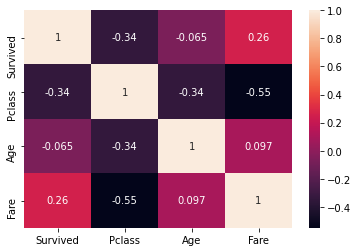

In [20]:
##let's visualize the effect of Pclass,Age,Fare on the Survived variable
import seaborn as sns
sns.heatmap(tita[['Survived','Pclass','Age','Fare']].corr(),annot=True)

### from the above heatmap we can derive that the Pclass and Fare has some impact on the survival rate of the passengers,age however has little to no correlation to the survival rate. Pclass and survived show a negative realtionship which can be explained by stating that the passnger with higher class have been ensured with more safety than the ones with lower and people who pay higher fare get higher class(1,2) and are safer.

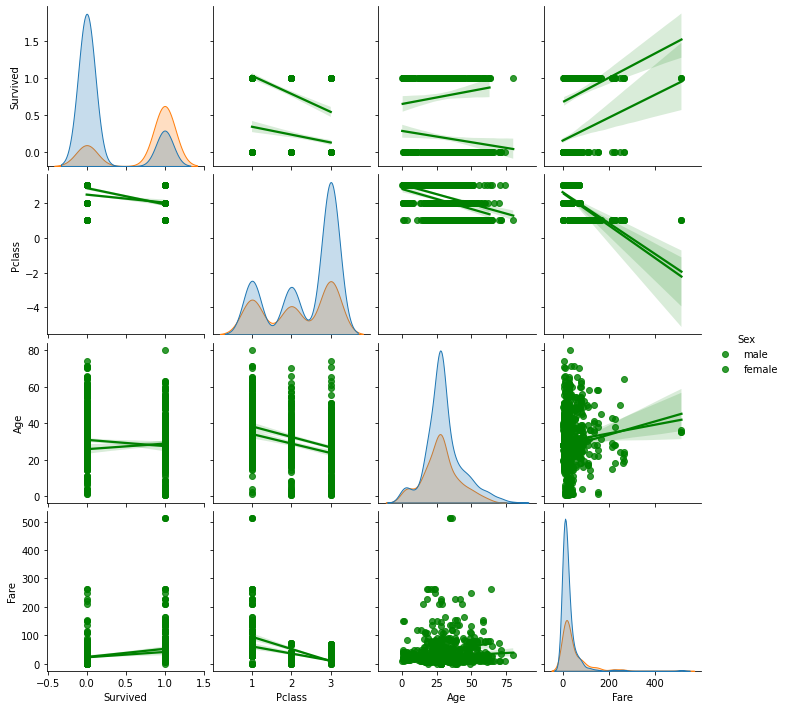

In [21]:
sns.pairplot(tita[['Survived','Pclass','Age','Fare','Sex']],plot_kws={'color':'green'},kind='reg',hue='Sex')

In [22]:
## let's move onto our k-fold thingy
tita.head()

,Survived,Pclass,Sex,Age,Fare,le_sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tita.drop(['Sex','Survived'],axis='columns'),tita.Survived,test_size=0.2)

In [24]:
x_train.head()

,Pclass,Age,Fare,le_sex
250,3,28.0,7.2500,1
713,3,29.0,9.4833,1
114,3,17.0,14.4583,0
128,3,28.0,22.3583,0
722,2,34.0,13.0000,1


In [25]:
len(x_test)

179

In [26]:
##let's check the score of each model by fitting the above test data:
svm_model=SVC()
Rf_model=RandomForestClassifier()
LR_model=LogisticRegression()

In [27]:
svm_model.fit(x_train,y_train)
Rf_model.fit(x_train,y_train)
LR_model.fit(x_train,y_train)

LogisticRegression()

In [28]:
print('svm_score = ',svm_model.score(x_test,y_test))
print('Rf_score = ',Rf_model.score(x_test,y_test))
print('LR_score = ',LR_model.score(x_test,y_test))

svm_score =  0.659217877094972
Rf_score =  0.8547486033519553
LR_score =  0.776536312849162


### each time we split the dataset into test and train a random sampling takes place which changes the accuracy of our model each time in that case we shall use cross validation technique to find the average accuracy which helps us choose our model

In [29]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3) ##Splits our dataset into three(three train,test datasets)


In [30]:
for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [31]:
## we will write a function to get the score of eacu model
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print(model,model.score(x_test,y_test))

In [32]:
get_score(LogisticRegression(),x_train,x_test,y_train,y_test)

LogisticRegression() 0.776536312849162


In [33]:
get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)

RandomForestClassifier() 0.8212290502793296


In [34]:
get_score(SVC(),x_train,x_test,y_train,y_test)

SVC() 0.659217877094972


In [35]:
from sklearn.model_selection import StratifiedKFold
KF=StratifiedKFold(n_splits=3)

In [36]:
tita.head()

,Survived,Pclass,Sex,Age,Fare,le_sex
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [37]:
tita.drop(['Sex'],axis='columns',inplace=True)


In [38]:
predictor=tita.drop(['Survived'],axis='columns')
target=tita.Survived

In [42]:
scores_lr=[]
scores_RF=[]
scores_svm=[]
for train_index,test_index in kf.split(predictor):
    x_train,x_test,y_train,y_test=predictor[train_index],predictor[test_index],target[train_index],target[test_index]
    scores_lr.append(get_score(LogisticRegression(),x_train,x_test,y_train,y_test))
                                                                                                     

KeyError: "None of [Int64Index([297, 298, 299, 300, 301, 302, 303, 304, 305, 306,\n            ...\n            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],\n           dtype='int64', length=594)] are in the [columns]"

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),predictor,target) ##this ,method does the same thing we tried to do above but got an error:/

array([0.7877095 , 0.78089888, 0.78651685, 0.7752809 , 0.80337079])

In [46]:
cross_val_score(LogisticRegression(),predictor,target).mean() ## mean score of Logistic regession

0.7867553825874082

In [47]:
cross_val_score(SVC(),predictor,target).mean()

0.6701462557278262

In [48]:
cross_val_score(RandomForestClassifier(),predictor,target).mean()

0.8103508882053859